In [ ]:
# Importando a lib do pandas para a analise
import pandas as pd

In [6]:
# Carregaremos o csv pra um DF (DataFrame)
df = pd.read_csv('desafio_indicium_imdb.csv')

In [7]:
# Vamos analisar as primeiras linhas para ter uma ideia inicial dos dados por aqui:
print(df.head())

   Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

  Certificate  Runtime                     Genre  IMDB_Rating  \
0           A  175 min              Crime, Drama          9.2   
1          UA  152 min      Action, Crime, Drama          9.0   
2           A  202 min              Crime, Drama          9.0   
3           U   96 min              Crime, Drama          9.0   
4           U  201 min  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  W

In [8]:
# vamos ver as informações das colunas agora:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB
None


In [15]:
# com a análise anterior podemos ver algumas coisas a se alterar, como por exemplo 'Runtime','Gross'
# que estão como object ao invés de int64, que seria melhor. E também 'Certificate' e 'Meta_score' tem valores nulos que
# precisam de tratamento.

In [11]:
# LIMPEZA DOS DADOS
# vamos criar um cópia do df, uma boa prática
df_limpo = df.copy()

In [ ]:
# LIMPANDO A COLUNA 'Runtime'
df_limpo['Runtime'] = df_limpo['Runtime'].str.replace(' min', '').astype(int)
#Aqui tiramos o ' min' do objeto e trocamos o tipo dele pra um inteiro ao invés de "texto"

In [19]:
# verificar se ainda há valores corretos:
print(df_limpo['Runtime'].describe())

count    999.000000
mean     122.871872
std       28.101227
min       45.000000
25%      103.000000
50%      119.000000
75%      137.000000
max      321.000000
Name: Runtime, dtype: float64


In [14]:
# LIMPANDO A COLUNA 'Gross'
df_limpo['Gross'] = df_limpo['Gross'].str.replace(',', '', regex=False)
# limpamos as virgulas e convertemos pra numero de novo
df_limpo['Gross'] = pd.to_numeric(df_limpo['Gross'], errors='coerce')
#o errors='coerce' serve para transformar valos não numéricos (NaN)

In [30]:
# vamos converter a coluna 'released_year' como número também, faz mais sentido
df_limpo['Released_Year'] = pd.to_numeric(df_limpo['Released_Year'], errors='coerce')

In [22]:
# LIDANDO COM OS VALORES NULOS
# para o 'meta_score', vamos com uma estratégia de preencher com a mediana
mediana_meta = df_limpo['Meta_score'].median()
df_limpo['Meta_score'] = df_limpo['Meta_score'].fillna(mediana_meta)

In [23]:
# para o 'gross' vamos seguir com mediana também, visto que é mais robusto e nos dará valores mais reais.
mediana_gross = df_limpo['Gross'].median()
df_limpo['Gross'] = df_limpo['Gross'].fillna(mediana_gross)

In [26]:
# para 'certificate' como desconhecido, como foi recomendado
df_limpo['Certificate'] = df_limpo['Certificate'].fillna('Unknown') # coloquei em inglês devido a origem da tabela estar nesse idioma também

In [32]:
# para 'released_year' poderia deixar nulo por ser apenas 1 linha, mas vou preencher para mediana pra que a maquina de predição funcione melhor
mediana_ano = df_limpo['Released_Year'].median()
df_limpo['Released_Year'] = df_limpo['Released_Year'].fillna(mediana_ano)

In [33]:
# Vamos verificar toda a nossa limpeza agora:
print(df_limpo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    float64
 3   Certificate    999 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     999 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          999 non-null    float64
dtypes: float64(4), int64(3), object(9)
memory usage: 125.0+ KB
None


In [35]:
# Através desses dados podemos fazer algumas hipoteses iniciais, como:

# Os filmes com maior orçamento, no casso nosso 'Gross', tendem a ter notas maiores? Faz sentido, podemos usar um gráfico de dispersão pra ver essa relação

# O gênero do filme influencia a nota final? Podemos ver um grafico em barras por exemplo, pra compararmos essas duas grandezas, ou um boxplot

# Qual a distribuição das notas do IMDB? Um histograma poderia nos mostrar as notas mais comuns dos filmes

In [36]:
# Que tal respondermos essas hipoteses por aqui??

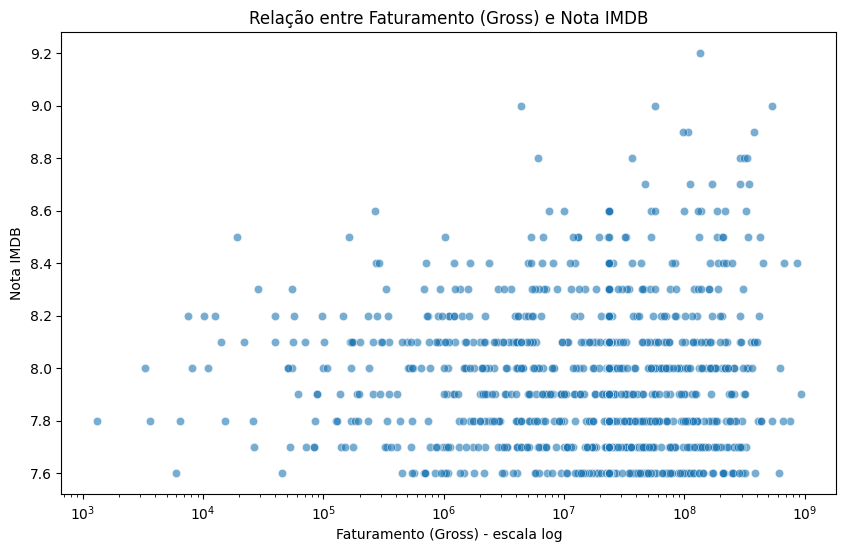

In [38]:
# Começando por: Filmes com maior Gross tendem a ter notas maiores?

# vamos importar libs importantes para a crianção desses graficos:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_limpo, x='Gross', y='IMDB_Rating', alpha=0.6)
plt.xscale('log')  # escala log ajuda a visualizar melhor
plt.title('Relação entre Faturamento (Gross) e Nota IMDB')
plt.xlabel('Faturamento (Gross) - escala log')
plt.ylabel('Nota IMDB')
plt.show()

In [47]:
print(df_limpo[['Gross','IMDB_Rating']].corr(method='spearman'))

# Respondendo: 

# Não da forma que esperei. O gráfico de dispersão mostra como filmes com grande faturamento, não necessariamente recebem notas mais altas.
# Essa correlação é fraca, filmes populares podem faturar muito, mas isso não necessariamente quer dizer nota alta

                Gross  IMDB_Rating
Gross        1.000000    -0.051678
IMDB_Rating -0.051678     1.000000


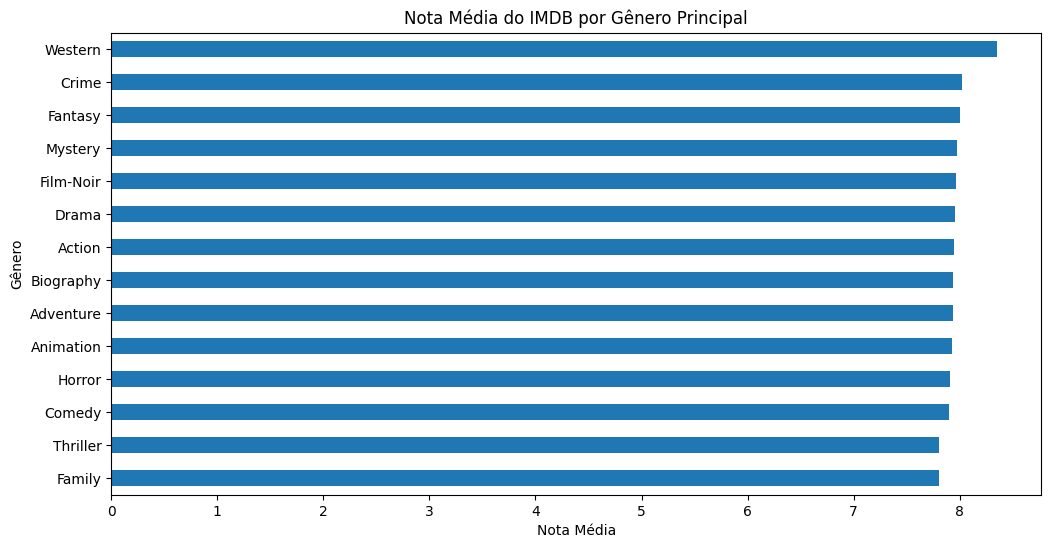

In [45]:
# 2: O gênero influencia a nota final?

# Criar coluna com o primeiro gênero (para facilitar boxplot)
df_limpo['Main_Genre'] = df_limpo['Genre'].apply(lambda x: x.split(',')[0].strip())

plt.figure(figsize=(12,6))
df_limpo.groupby('Main_Genre')['IMDB_Rating'].mean().sort_values().plot(kind='barh')
plt.title('Nota Média do IMDB por Gênero Principal')
plt.xlabel('Nota Média')
plt.ylabel('Gênero')
plt.show()

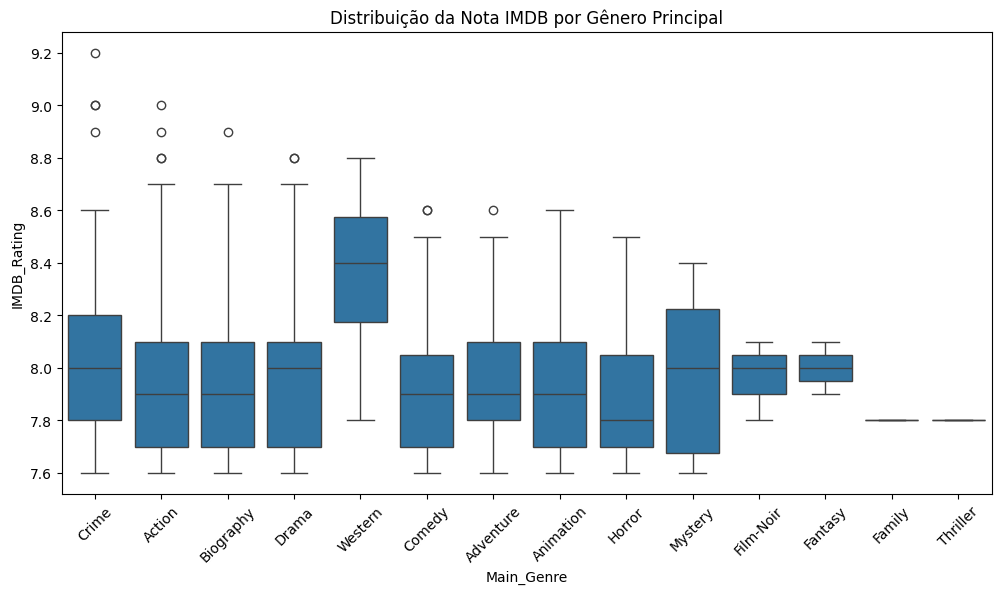

In [49]:
# Alternativa

plt.figure(figsize=(12,6))
sns.boxplot(data=df_limpo, x='Main_Genre', y='IMDB_Rating')
plt.xticks(rotation=45)
plt.title('Distribuição da Nota IMDB por Gênero Principal')
plt.show()

In [ ]:
# Respondendo: 

# Sim, mas com suas diferenças. Vemos, no bloxplot por exemplo, que Western e Crime costumam ter notas mais altas, 
# enquanto outros gêneros como Thriller e Family tendem a ter uma variação e notas ligeralmente mais baixas

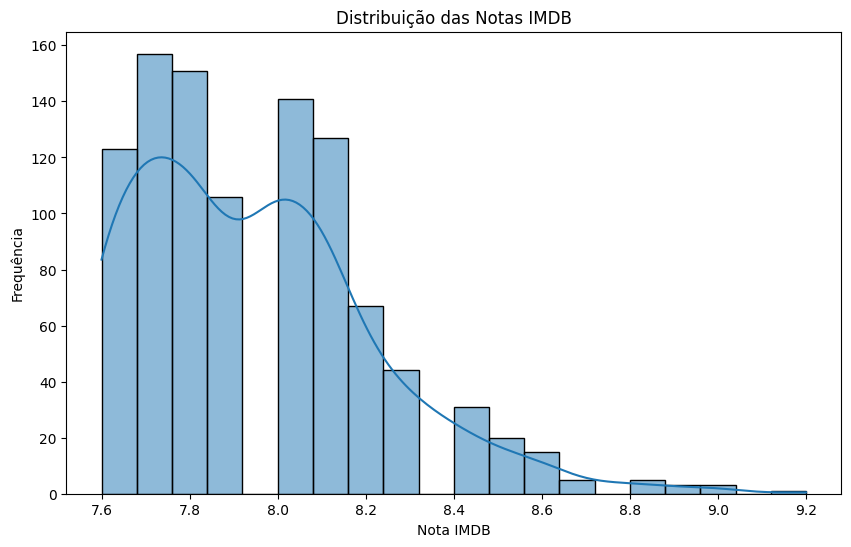

In [42]:
# 3: Qual a distribuição das notas do IMDB?

plt.figure(figsize=(10,6))
sns.histplot(df_limpo['IMDB_Rating'], bins=20, kde=True)
plt.title('Distribuição das Notas IMDB')
plt.xlabel('Nota IMDB')
plt.ylabel('Frequência')
plt.show()

In [50]:
# Respondendo:

# As notas se concentram entre 7.7 e 8.1. É uma distruibuição normal, o que indica que os filmes do dataset tem avaliações razoavelmente boas.

In [ ]:
# Agora vamos responder as perguntas com base no EDA:

# 1. Qual filme você recomendaria para uma pessoa que você não conhece?

# Se você não conhece a pessoa, a aposta mais segura é um filme que agrada a maioria. 
# Isso quer dizer, um filme com nota alta e um número muito grande de votos. 
# Uma nota alta com poucos votos pode ser um filme "nichado". Uma nota alta com milhões de votos significa um consenso geral.
# --------------------------------------------
# 2. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento (Gross)?

# Precisamos ver quais variáveis numéricas sobem junto com o faturamento. A ferramenta para isso é a correlação!
# Vamos calcular a matriz da correlação pra verificar:

In [51]:
# Selecionando apenas colunas numéricas para a correlação
colunas_numericas = df_limpo.select_dtypes(include=['number'])
correlacao = colunas_numericas.corr()

# O faturamento ('Gross') é nossa variável de interesse
print(correlacao['Gross'].sort_values(ascending=False))

Gross            1.000000
No_of_Votes      0.602705
Released_Year    0.232874
Runtime          0.138628
IMDB_Rating      0.088139
Meta_score      -0.045268
Unnamed: 0      -0.058419
Name: Gross, dtype: float64


In [ ]:
# É, podemos ver que 'No_of_votes' tem correlação mais forte com 'Gross'. Como respondido na primeira pergunta, isso faz sentido:
# filmes populares (mais votos) tendem a arrecadar mais. 'Meta_score' também pode ter uma correlação positiva.
# --------------------------------------------
# 3. Quais insights podem ser tirados com a coluna Overview?

# A análise da coluna 'Overview' com técnicas de Processamento de Linguagem Natural (NLP) oferece insights estratégicos para a PProductions,
# revelando o "DNA narrativo" dos filmes de sucesso. A investigação mostra que, embora os filmes mais aclamados
# se ancorem em "temas humanos universais" como vida e família, cada gênero possui um vocabulário temático distinto
# que atende às expectativas do público. 
# O insight mais valioso, no entanto, é que as sinopses dos filmes de elite consistentemente destacam uma jornada de transformação e conflito,
# utilizando uma linguagem ativa de superação. Juntos, esses padrões fornecem um guia prático para que o estúdio possa
# desenvolver e comercializar roteiros com maior potencial de ressonância e sucesso crítico.
# --------------------------------------------
# 4. É possível inferir o gênero do filme a partir dessa coluna?

# Sim, com toda certeza é totalmente possível! Este é um problema clássico de NLP chamado "Classificação de Texto". Vamos usar uma analogia simples
# pra entendermos melhor: Imagine que você tem várias caixas, cada uma com uma etiqueta de gênero, por exemplo (Ação, Comédia, Drama, etc).
# Você lê a Overview e decide em qual caixa o filme se encaixa melhor. Um modelo de Machine Learning aprende a fazer isso automaticamente.
# Ele percebe que sinopses com "space", "alien", "planet" têm alta chance de serem de ficção científica, por exemplo, o que faz certo sentido.